<a href="https://colab.research.google.com/github/DavidPuigV/Nuclio/blob/main/Critica_positiva_negativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras as ks
from tensorflow.keras.datasets import imdb
from matplotlib import pyplot as plt
import numpy as np

In [2]:
vocabulary_size = 10000

In [3]:
(x_train_original, y_train_original), (x_test_original, y_test_original) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [4]:
print('size train: ', x_train_original.size)
print('size test: ', x_test_original.size)

size train:  25000
size test:  25000


In [5]:
datos = np.concatenate((x_train_original, x_test_original), axis = 0)
labels = np.concatenate((y_train_original, y_test_original), axis = 0)

In [6]:
print(np.unique(labels))
print('Palabras unicas: ', len(np.unique(np.hstack(datos))))

[0 1]
Palabras unicas:  9998


In [7]:
longitud = [len(i) for i in datos]
print('longitud media frases:', np.mean(longitud))
print('desviacion standard:', np.std(longitud))

longitud media frases: 234.75892
desviacion standard: 172.91149458735703


In [8]:
# van de 62 a 408 palabras   (235+-173)

In [9]:
print('etiqueta primera', labels[0])   # la primera etiqueta es 1 por tanto critica positiva
print('frase primera', datos[0])

etiqueta primera 1
frase primera [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [10]:
# vamos a ver si podemos traducir esa frase, vamos a ver el indexador

index= imdb.get_word_index()    # lee indices de la base de datos IMDB word --> valor
reverse_index = dict([(valor, palabra) for (palabra, valor) in index.items()]) # montamos un indice reverso para ir de valor --> word


In [11]:
print(index.get('bravora'))

52018


In [12]:
reverse_index.get(52018)

'bravora'

In [13]:
texto_decoded = ' '.join([reverse_index.get(i-3,'\n') for i in datos[0]]) # decode del texto de la primera frase
print(texto_decoded)


 this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert 
 is an amazing actor and now the same being director 
 father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for 
 and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also 
 to the two little boy's that played the 
 of norman and paul they were just brilliant children are often left out of the 
 list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [14]:
from tensorflow.keras.preprocessing import sequence

In [15]:
datos = sequence.pad_sequences(datos, maxlen=vocabulary_size) # todos los vectores son de diferentes tamños y ahora los convertimos todos igual añadiendo ceros al inicio
labels = np.array(labels).astype('float32') # no los metemos al final porque al meterlo al final, la sigmoide los olvidara y no queremos que los olvide.

In [16]:
longitud = [len(i) for i in datos]
print('longitud media frases:', np.mean(longitud))
print('desviacion standard:', np.std(longitud))

longitud media frases: 10000.0
desviacion standard: 0.0


In [17]:
print(datos[0]) # fila
print(datos)   # array


[  0   0   0 ...  19 178  32]
[[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...   21  846 5518]
 [   0    0    0 ... 2302    7  470]
 [   0    0    0 ...   34 2005 2643]]


In [18]:
x_test = datos[-10000:]
y_test = labels[-10000:]

x_train = datos[:-10000]
y_train = labels[:-10000]

len(x_train)

40000

In [19]:
# montamos nuestra red neuronal
model = ks.Sequential()

model.add(ks.layers.Embedding(vocabulary_size, output_dim=32, input_length=vocabulary_size)) # array to vector
model.add(ks.layers.LSTM(100))
model.add(ks.layers.Dense(32, activation='relu', kernel_initializer='he_uniform')) # fully conected
model.add(ks.layers.Dropout(0.5))
model.add(ks.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10000, 32)         320000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 32)                3232      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 376,465
Trainable params: 376,465
Non-trainable params: 0
_________________________________________________________________


In [20]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_loss', patience=3)

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [22]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test), callbacks=[callback])

Epoch 1/20
313/313 [==============================] - 204s 643ms/step - loss: 0.6073 - accuracy: 0.6477 - val_loss: 0.3001 - val_accuracy: 0.8705
Epoch 2/20
313/313 [==============================] - 201s 641ms/step - loss: 0.2963 - accuracy: 0.8861 - val_loss: 0.2723 - val_accuracy: 0.8884
Epoch 3/20
313/313 [==============================] - 201s 641ms/step - loss: 0.2070 - accuracy: 0.9263 - val_loss: 0.2926 - val_accuracy: 0.8961
Epoch 4/20
313/313 [==============================] - 200s 640ms/step - loss: 0.1789 - accuracy: 0.9367 - val_loss: 0.3257 - val_accuracy: 0.8794
Epoch 5/20
313/313 [==============================] - 200s 639ms/step - loss: 0.1514 - accuracy: 0.9479 - val_loss: 0.3234 - val_accuracy: 0.8803


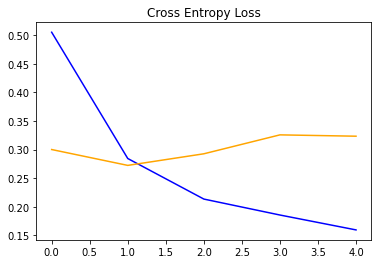

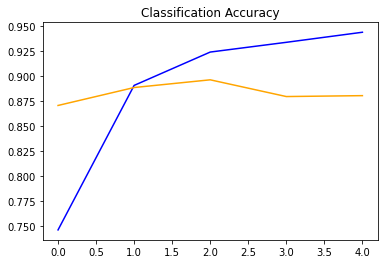

In [23]:

plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.show()